# Project: : Predicting Student Academic Performance Through Data Analysis and Machine Learning











Problem Statement:
Academic performance is influenced by various factors including study hours, sleep, past performance, and extracurricular activities. However, it is often difficult to measure which variables contribute most significantly to a student's success. This project focuses on predicting a student's performance index using personal and academic data.

Project Objective:
Conduct EDA to find trends and relationships between performance and influencing factors.
Identify key attributes (e.g., hours studied, previous scores, sleep hours) affecting academic outcomes.
Build a predictive model to estimate the Performance Index using regression techniques.
Offer insights that can guide students, parents, and educators in improving learning strategies.

Business Context:
In educational institutions and tutoring services, predicting student performance can:
Help in early intervention for at-risk students.
Enable personalized learning plans.
Improve the overall effectiveness of academic programs.
Educational startups and EdTech platforms can use such models to provide data-backed learning insights and academic recommendations.

## Loading Libraries & Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# read data set

data = pd.read_csv(r"C:\Users\Saloni Verma\Desktop\student performance\Student_Performance.csv")

In [5]:
# see top 5 rows

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
# see column data type and some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# missing value in each column

data.isna().sum() 

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [8]:
# see dimensions

data.shape

(10000, 6)

In [44]:
data.duplicated().sum()

127

In [45]:
data.drop_duplicates(inplace = True)
data.shape

(9873, 6)

In [46]:
data.isnull().sum()  


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [47]:
# see quick info of numeric values

data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


**We Can see :**
   - Dataset has no null values
   

## Univariate Analysis & Visualizations

In [67]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [68]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

### Discovering `Hours Studied` column

In [69]:
# see uniqie values

data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

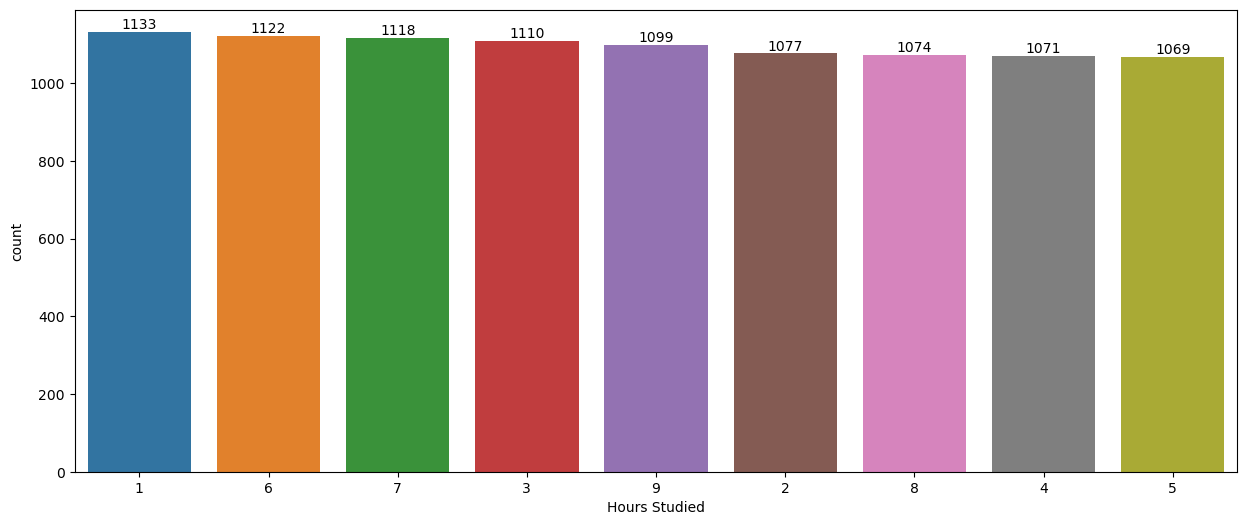

In [70]:
# number of unique values is relatively large, count plot more suitable for it

plt.figure(figsize = (15,6))

count_plot(column_name = "Hours Studied") 

**We can see :**
   - Most student studied "1" hour
   - Other students studied Similar numbers of hours

### Discovering `Previous Scores` column

C:\Users\Saloni Verma\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


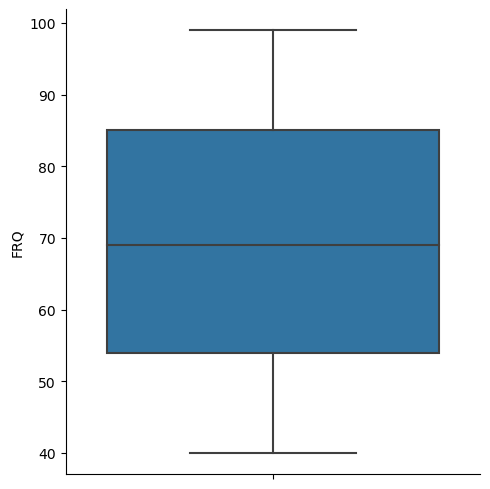

In [71]:
# see distribution 

box_plot(y_axis = "Previous Scores") 

**We can see :**
   - 50 % of students scored above about 70
   

### Discovering `Extracurricular Activities` column

In [72]:
# see unique values

data["Extracurricular Activities"].unique()

array([1, 0])

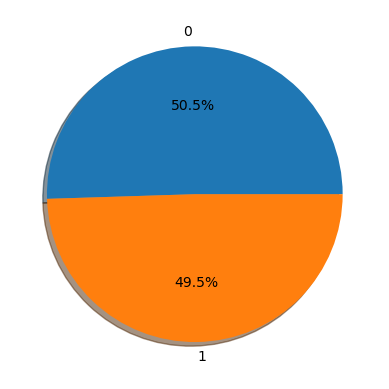

In [73]:
# output number of values count

plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()

**We can see :**
   - Most student "don't" participate in extracurricular activities

### Discovering `Sleep Hours` column

In [74]:
# see unique values

data["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

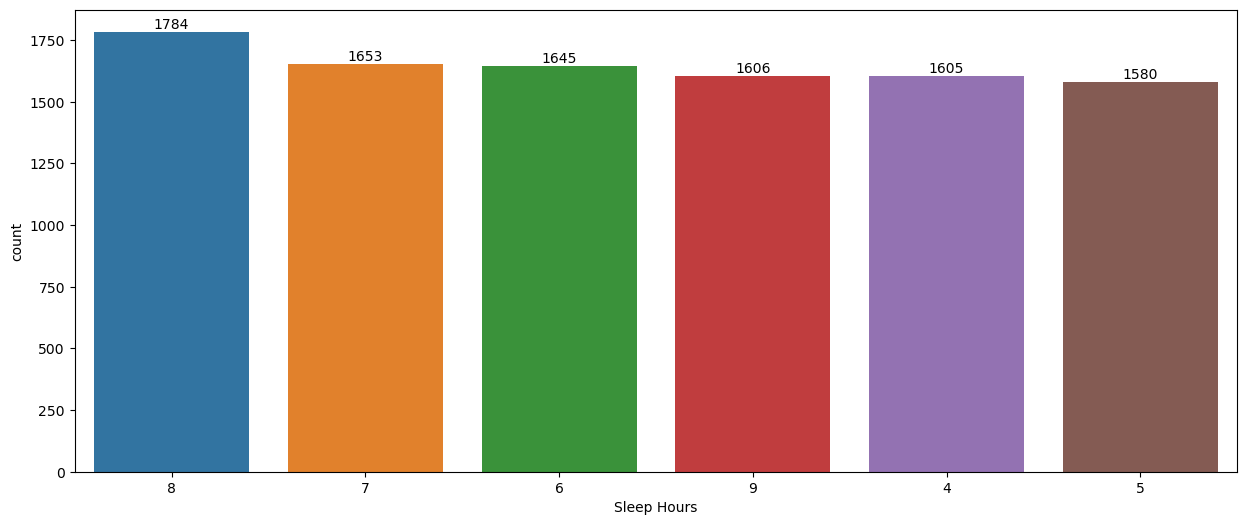

In [75]:
# number of unique values is relatively large, count plot more suitable for it

plt.figure(figsize = (15,6))

count_plot(column_name = "Sleep Hours")

**We can see :**
   - Most student Sleep 8 hours
   - Other students sleep Similar numbers of hours


### Discovering `Sample Question Papers Practiced` column

In [76]:
# see unique values

data["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

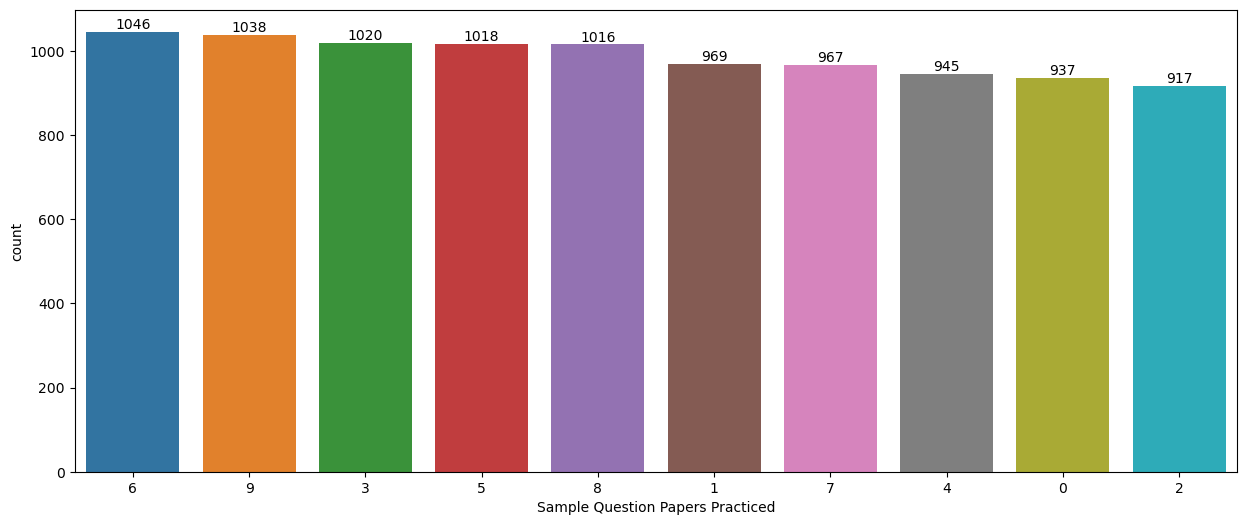

In [77]:

plt.figure(figsize = (15,6))

count_plot(column_name = "Sample Question Papers Practiced")

**We can see :**
   - All student have Similar The number of sample question papers the practiced.
   - **There are students who did not practice any questions**

## Bivariate Analysis & Visualizations

C:\Users\Saloni Verma\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


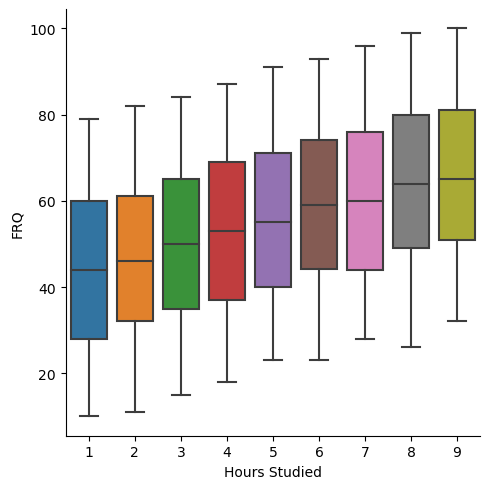

In [78]:
# What is "Hours Studied" and "Performance Index" distribution

box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

- As we can see, the more hours you study, the greater the success rate

C:\Users\Saloni Verma\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


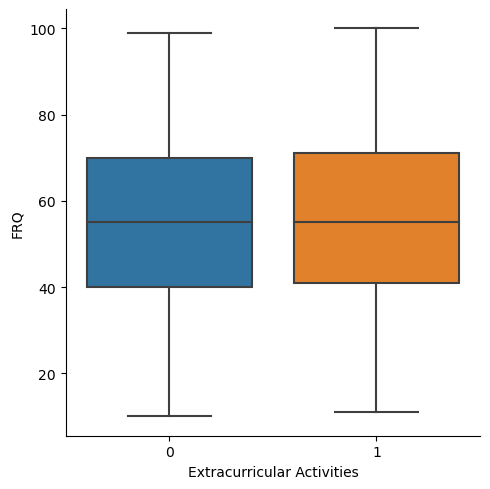

In [79]:
# What is "	Extracurricular Activities" and "Performance Index" distribution

box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index") 

- Participation in extracurricular activities helps to a very small extent in obtaining high grades

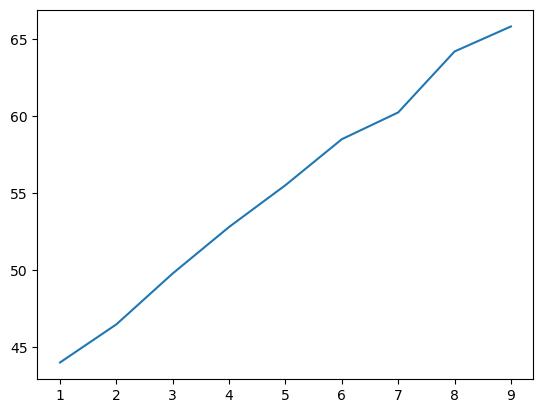

In [80]:
# What is  "Performance Index" distribution

avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

- The more hours you sleep, Performance index increase

### Heatmap of Correlation

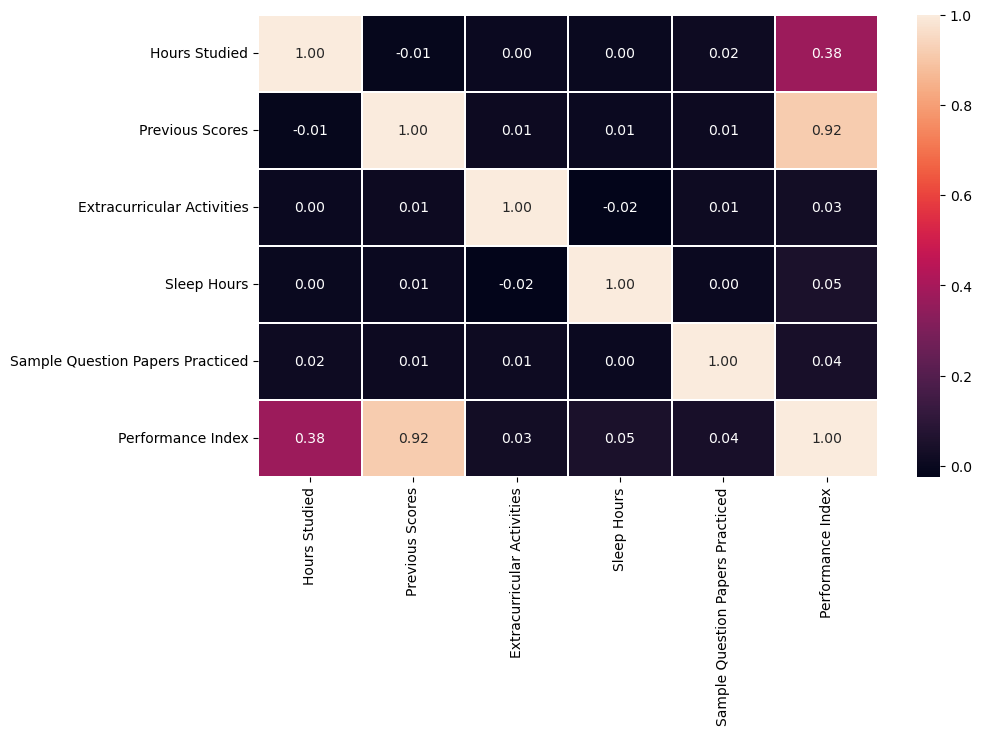

In [81]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

There's a lot of Strong Positive Relationships between Performance Index and Features

##  Data Preprocessing

In [82]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [83]:
# create object from labelencoder

encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [84]:
# see sample of data

data.sample(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
3649,4,61,0,5,0,42.0
3707,6,84,1,7,7,72.0


In [85]:
# Splitting data into Indipendent and Dependent Variable

Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [86]:
# see sample of train data

Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
3235,3,82,0,5,8
6894,6,72,1,4,9
5391,7,84,1,7,6


In [87]:
# see sample of target label

Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [89]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (7898, 5)
y_train shape:  (7898,)
x_test shape:  (1975, 5)
y_test shape:  (1975,)


## Modeling

In [90]:
# create object from RandomForestRegressor

model = LinearRegression()

In [91]:
# fit model

model.fit(X_train,y_train)

LinearRegression()

## Evaluating Results

In [92]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9887391160677558

In [93]:
# see predicted values

predict = np.round(model.predict(X_test), decimals = 1)

In [94]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6099,47.0,46.5
106,76.0,80.3
9265,62.0,61.1
4707,23.0,22.7
2155,76.0,74.8
...,...,...
8732,19.0,18.3
3112,39.0,40.3
5297,77.0,77.1
6116,88.0,86.2


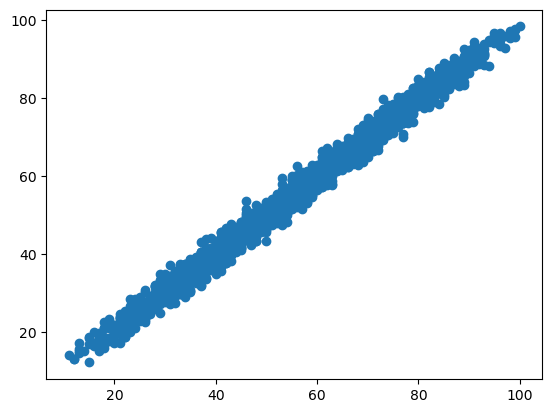

In [95]:
# Create scatter plot to see distribution

plt.scatter(y_test, predict)
plt.show()

In [96]:
# see mean absolute error 

mean_absolute_error(y_test,predict)

1.6469367088607596

In [97]:
# see score

r2_score(y_test,predict)

0.9884215285728708

In [98]:
# see coefficients values

model.coef_

array([2.8510219 , 1.01843034, 0.57382297, 0.47207329, 0.18870366])

In [99]:
# see y intercept

model.intercept_

-33.981324496440635

**Equation of our multiple linear regression model is :**
   - 2.85 × Hours Studied + 1.01 × Previous Scores + 0.57 × Extracurricular Activities + 0.47 × Sleep Hours + 0.18 × Sample Question Papers Practiced - 33.92

In [101]:
# Input values from the user
hours_studied = float(input("Enter hours studied: "))
previous_scores = float(input("Enter previous scores: "))
extracurricular = input("Participated in extracurricular activities? (Yes/No): ")
sleep_hours = float(input("Enter average sleep hours: "))
sample_papers = int(input("Enter number of sample question papers practiced: "))

# Convert 'Yes'/'No' to numerical format
extracurricular_num = 1 if extracurricular.lower() == "yes" else 0

# Create input array
input_data = [[hours_studied, previous_scores, extracurricular_num, sleep_hours, sample_papers]]

# Make prediction
predicted_performance = model.predict(input_data)

print(f"Predicted Performance Index: {predicted_performance[0]:.2f}")


Enter hours studied: 5
Enter previous scores: 56
Participated in extracurricular activities? (Yes/No): yes
Enter average sleep hours: 7
Enter number of sample question papers practiced: 5
Predicted Performance Index: 42.13


C:\Users\Saloni Verma\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
